# HR-анализ

Оглавление<a id='toc0_'></a>    
- 1. [Вступление](#toc1_)    
  - 1.1. [Цель проекта](#toc1_1_)    
  - 1.2. [Описание данных](#toc1_2_)    
- 2. [Подключение датафрейма и необходимых библиотек](#toc2_)    
  - 2.1. [Подключение библиотек](#toc2_1_)    
  - 2.2. [Подключение датафрейма](#toc2_2_)    
- 3. [Знакомство с данными](#toc3_)    
  - 3.1. [Информация о датафрейме](#toc3_1_)    
  - 3.2. [Пример из датафрейма](#toc3_2_)    
  - 3.3. [Столбцы датафрема](#toc3_3_)    
  - 3.4. [Дубликаты записей](#toc3_4_)    
  - 3.5. [Кол-во пропусков в каждом столбце](#toc3_5_)    
- 4. [Исследование зависимости временных промежутков между этапами от значений поля "Добавлен/Откликнулся"](#toc4_)    
  - 4.1. [Создание промежутков между этапами](#toc4_1_)    
  - 4.2. [Сводная таблица по Откликнулся/Добавлен](#toc4_2_)    
  - 4.3. [Гистограммы промежутков по Откликнулся/Добавлен](#toc4_3_)    
  - 4.4. [Тест Манна-Уитни](#toc4_4_)    
- 5. [Построение воронки кандидатов](#toc5_)    
  - 5.1. [Заполнение пробелов между этапами](#toc5_1_)    
  - 5.2. [Группировка по вакансиям](#toc5_2_)    
  - 5.3. [Построение дашборда](#toc5_3_)    
- 6. [Разбиение вакансий по группам](#toc6_)    
  - 6.1. [Стандартное отклонение распределения типов причины отказа](#toc6_1_)    
  - 6.2. [Медиана от среднего временных промежутков между этапами](#toc6_2_)    
  - 6.3. [Средняя разность конверсий по всем этапам](#toc6_3_)    
  - 6.4. [Поиск групп вакансий с помощью кластеризации](#toc6_4_)    
  - 6.5. [3D-визуализация полученных кластеров](#toc6_5_)    
- 7. [Заключение](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Вступление](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Цель проекта](#toc0_)

По выгрузке данных исследовать:
- зависимость среднего времени между этапами Скриннинг - Интервью с менеджером  - Интервью с заказчиком - Оффер от типа добавления (Добавлен и Откликнулся);

- воронку от этапа Откликнулся/Добавлен до этапа оффер, на которой должно быть видно количество кандидатов на каждом этапе по каждой вакансии и конверсии перехода на следующий этап;

- на какие категории можно сгруппировать вакансии в зависимости от совокупности факторов (воронки, время перехода от этапа к этапу, причины отвала)

### 1.2. <a id='toc1_2_'></a>[Описание данных](#toc0_)

Столбцы:

- **ID Кандидата в Potok** — уникальный идентификатор кандидата в системе подбора персонала Potok;
- **ID Вакансии** — уникальный идентификатор вакансии, на которую рассматривается или откликнулся кандидат;  
- **Отдел** — отдел компании, в который осуществляется подбор;
- **Заказчик** — лицо , инициировавшее подбор на данную вакансию;
- **Город проживания кандидата** — город, в котором проживает кандидат; 
- **Дата и время добавления кандидата** — дата и время, когда кандидат был добавлен рекрутером в процесс подбора по вакансии;
- **Добавлен/Откликнулся** — указывает, как кандидат попал в воронку: был ли он **добавлен рекрутером** вручную или **откликнулся сам** на вакансию; 
- **Причина отказа** — причина, по которой кандидат выбыл из процесса подбора;
- **Дата и время отказа** — дата и время, когда была зафиксирована причина отказа кандидата;
- **Источник** — канал, через который был найден или привлечён кандидат;
- **Откликнулся (Дата)** — дата, когда кандидат откликнулся на вакансию;  
- **Откликнулся (Пользователь)** — сотрудник, который обработал отклик кандидата;
- **Добавлен (Дата)** — дата и время, когда кандидат был добавлен в подбор на вакансию;  
- **Добавлен (Пользователь)** — сотрудник, добавивший кандидата в вакансию;  
- **Скриннинг (Дата)** — дата и время проведения скринингового звонка;
- **Скриннинг (Пользователь)** — сотрудник, проводивший скрининг кандидата; 
- **Интервью с менеджером (Дата)** — дата и время интервью с менеджером;  
- **Интервью с менеджером (Пользователь)** — сотрудник, проводивший интервью с менеджером;  
- **Интервью с заказчиком (Дата)** — дата и время финального интервью с заказчиком вакансии;  
- **Интервью с заказчиком (Пользователь)** — сотрудник, проводивший финальное интервью;  
- **Оффер (Дата)** — дата отправки официального оффера кандидату;  
- **Оффер (Пользователь)** — сотрудник, отправивший оффер;  
- **Принят (Дата)** — дата, когда кандидат официально принял оффер;  
- **Принят (Пользователь)** — сотрудник, принявший кандидата.

## 2. <a id='toc2_'></a>[Подключение датафрейма и необходимых библиотек](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Подключение библиотек](#toc0_)

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu
from plotly import graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import hdbscan
import plotly.express as px

### 2.2. <a id='toc2_2_'></a>[Подключение датафрейма](#toc0_)

In [2]:
df = pd.read_excel('./Выгрузка статистики_2023.04.03_13_23.xlsx')

## 3. <a id='toc3_'></a>[Знакомство с данными](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Информация о датафрейме](#toc0_)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10850 entries, 0 to 10849
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ID Кандидата в Potok                  10850 non-null  int64         
 1   ID Вакансии                           10850 non-null  int64         
 2   Отдел                                 0 non-null      float64       
 3   Заказчик                              0 non-null      float64       
 4   Город проживания кандидата            6320 non-null   object        
 5   Дата и время добавления кандидата     10850 non-null  datetime64[ns]
 6   Добавлен/Откликнулся                  10850 non-null  object        
 7   Причина отказа                        3097 non-null   object        
 8   Дата и время отказа                   3097 non-null   datetime64[ns]
 9   Источник                              10850 non-null  object        
 10

### 3.2. <a id='toc3_2_'></a>[Пример из датафрейма](#toc0_)

In [4]:
df.head(3)

,ID Кандидата в Potok,ID Вакансии,Отдел,Заказчик,Город проживания кандидата,Дата и время добавления кандидата,Добавлен/Откликнулся,Причина отказа,Дата и время отказа,Источник,...,Скриннинг (Дата),Скриннинг (Пользователь),Интервью с менеджером (Дата),Интервью с менеджером (Пользователь),Интервью с заказчиком (Дата),Интервью с заказчиком (Пользователь),Оффер (Дата),Оффер (Пользователь),Принят (Дата),Принят (Пользователь)
0,17062837,439320,NaN,NaN,Москва,2022-04-14 10:48:24,Добавлен,NaN,NaT,Linkedin,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1,17063205,439320,NaN,NaN,Москва,2022-04-14 11:06:48,Добавлен,NaN,NaT,Linkedin,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
2,17063313,439320,NaN,NaN,Москва,2022-04-14 11:09:56,Добавлен,NaN,NaT,Linkedin,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


### 3.3. <a id='toc3_3_'></a>[Столбцы датафрема](#toc0_)

Поменяем названия столбцов для удобства:

In [5]:
df.rename(columns={
    "ID Кандидата в Potok": "candidate_id",
    "ID Вакансии": "vacancy_id",
    "Отдел": "department",
    "Заказчик": "requester",
    "Город проживания кандидата": "city",
    "Дата и время добавления кандидата": "source_at",
    "Добавлен/Откликнулся": "source_type",
    "Причина отказа": "rejection_reason",
    "Дата и время отказа": "rejected_at",
    "Источник": "source",
    "Откликнулся (Дата)": "applied_at",
    "Откликнулся (Пользователь)": "applied_by",
    "Добавлен (Дата)": "added_at",
    "Добавлен (Пользователь)": "added_by",
    "Скриннинг (Дата)": "screening_at",
    "Скриннинг (Пользователь)": "screening_by",
    "Интервью с менеджером (Дата)": "manager_interview_at",
    "Интервью с менеджером (Пользователь)": "manager_interview_by",
    "Интервью с заказчиком (Дата)": "client_interview_at",
    "Интервью с заказчиком (Пользователь)": "client_interview_by",
    "Оффер (Дата)": "offer_at",
    "Оффер (Пользователь)": "offer_by",
    "Принят (Дата)": "accepted_at",
    "Принят (Пользователь)": "accepted_by"
}, inplace = True)

### 3.4. <a id='toc3_4_'></a>[Дубликаты записей](#toc0_)

Дубликаты по ключевым полям с идентификаторами кандидата и вакансии:

In [6]:
df[['candidate_id', 'vacancy_id']].duplicated().sum()

np.int64(0)

Дубликатов нет.

### 3.5. <a id='toc3_5_'></a>[Кол-во пропусков в каждом столбце](#toc0_)

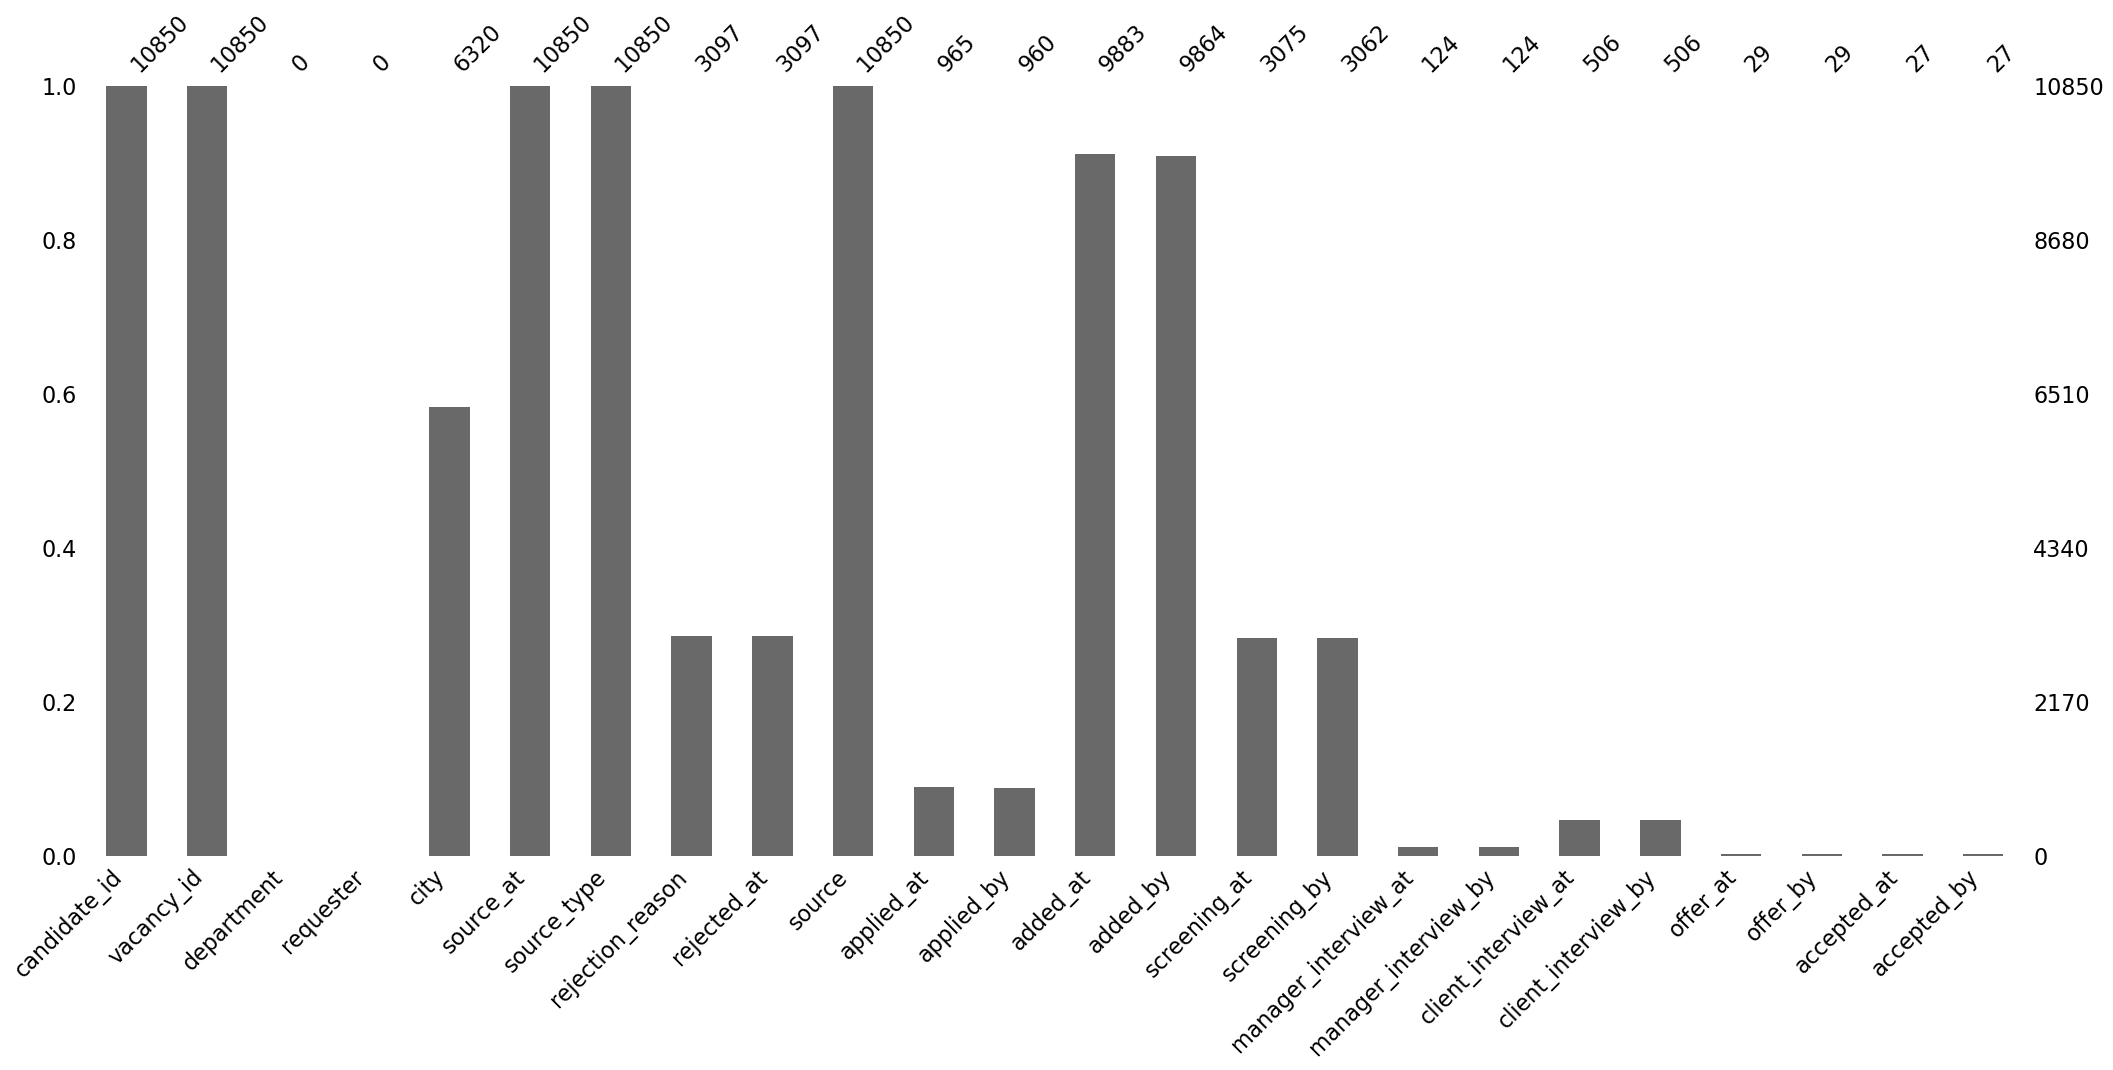

In [7]:
msno.bar(df)
plt.show()

Рассмотрим матрицу корреляций появления пропусков между столбцами:

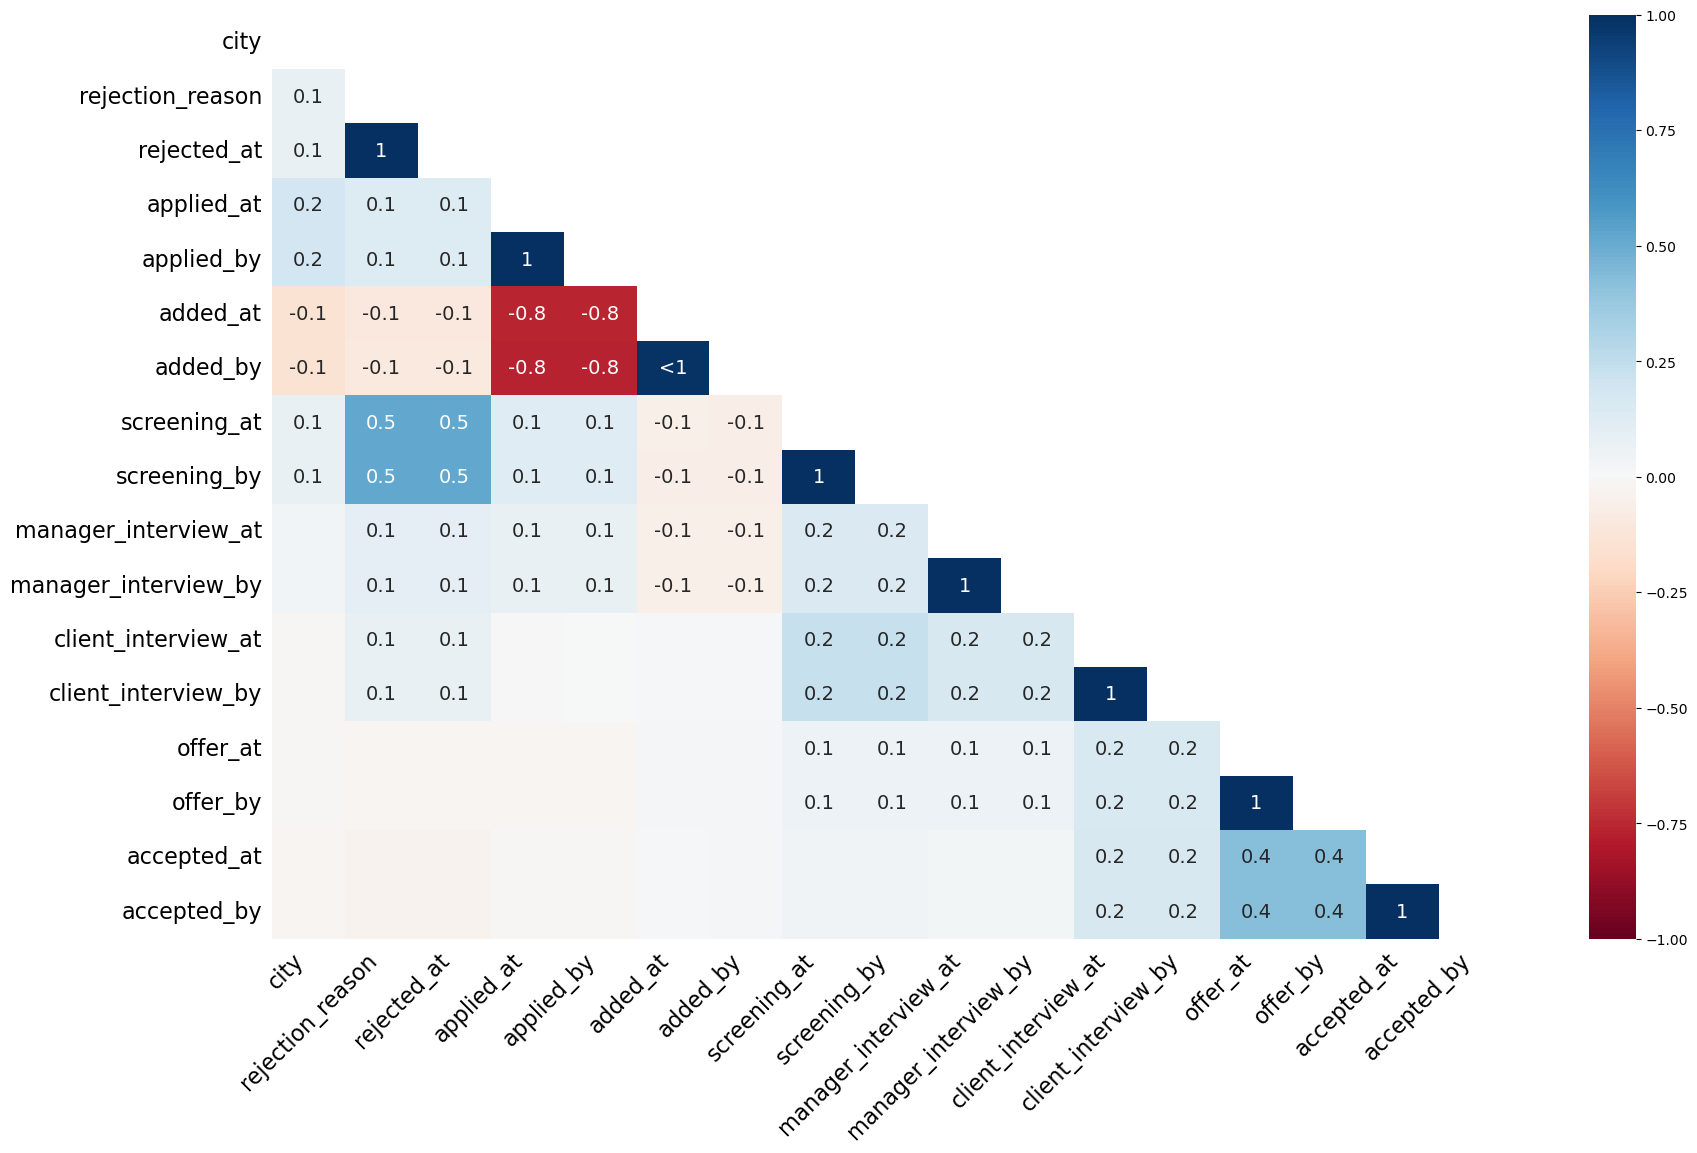

In [8]:
msno.heatmap(
    df[df.columns[(df.isna().sum() > 0)]]
)
plt.show()

Можно увидеть высокую корреляцию появления пропусков между полями с информацией об откликнувшихся пользователей и добавленными вручную, это интуитивно понятно - так происходит, потому что пользователь либо добавлен, либо сам откликнулся, но тогда надо понять, почему корреляция не -1, а всего -0.8. Значит у нас должны присутствовать записи, где пропуски есть одновременно в обоих столбцах, или их нет одновременно в обоих столбцах.

В любом случае все эти три поля обозначают начало взаимодействия с кандидатом, поэтому давайте оставим одно поле, которое будет содержать последнюю дату из указанных:

In [9]:
df['source_at'] = df[['added_at', 'applied_at', 'source_at']].max(axis=1).dt.floor('s')
df.drop(['applied_at', 'added_at'], axis=1, inplace=True)

Так как поля с информацией об отделе и заказчике (`department` и `requester`) полностью пусты (а точнее скорее всего скрыты с целью конфиденциальности, так как это тестовое задание), удалим их за ненадобностью:

In [10]:
df.drop(['department', 'requester'],
        axis=1, inplace = True)

Пропуски в столбце с городом (`city`), очевидно, означают, что пользователь не указал его в резюме, поэтому заменим их заглушкой:

In [11]:
df.city = df.city.fillna('Не указан')

Пропуски в столбце с причиной отказа (`rejection_reason`), очевидно, связаны с тем, что кандидат всё еще находится в процессе отбора.

Пропуски в столбцах `screening_at`, `manager_interview_at`, `client_interview_at`, `offer_at`, `accepted_at` в первую очередь связаны с тем, что кандидат ещё не дошел до данных этапов, однако возможен и ещё один вариант, при котором этапы скрининга и/или интервью с менеджером могут быть пропущены (например, из-за уверенности в кандидате) и кандидат сразу же будет направлен на интервью с заказчиком, отсюда и дополнительные пропуски в столбцах `screening_at`, `manager_interview_at`.

## 4. <a id='toc4_'></a>[Исследование зависимости временных промежутков между этапами от значений поля "Добавлен/Откликнулся"](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Создание промежутков между этапами](#toc0_)

Итак, давайте добавим столбцы с интервалами времени от скрининга (`screening_at`) до следующего этапа (именно следующего, а не конкретно интервью с менеджером, так как он может быть пропущен), от интервью с менеджером (`manager_interview_at`) до интервью с заказчиком (`client_interview_at`), от интервью с заказчиком до оффера (`offer_at`) и общим интервалом до оффера: 

In [12]:
# от скриннинга до следующего этапа
df['screening_to_next'] = \
(df[['manager_interview_at',
     'client_interview_at',
     'offer_at',
     'accepted_at']].min(axis=1) - df.screening_at).dt.total_seconds()/60/60/24

In [13]:
# от интервью с менеджером до интервью с заказчиком
df['manager_to_client'] = \
(df[['client_interview_at',
     'offer_at',
     'accepted_at']].min(axis=1) - df.manager_interview_at).dt.total_seconds()/60/60/24

In [14]:
# от интервью с заказчиком до оффера 
df['client_to_offer'] = \
(df[['offer_at',
     'accepted_at']].min(axis=1) - df.client_interview_at).dt.total_seconds()/60/60/24

In [15]:
# суммарное время по всем этапам до оффера
df['to_offer'] = (df.offer_at - \
df[['screening_at',
    'manager_interview_at',
    'client_interview_at']].min(axis=1)).dt.total_seconds()/60/60/24

In [16]:
intervals = ['screening_to_next',
             'manager_to_client',
             'client_to_offer',
             'to_offer']

### 4.2. <a id='toc4_2_'></a>[Сводная таблица по Откликнулся/Добавлен](#toc0_)

Чтобы рассмотреть, как влияет факт, был ли добавлен кандидат или самостоятельно откликнулся, на временные промежутки между интервалами, построим сводную таблицу и графики для каждого из этапов, разделяя кандидатов в них на две соответствующие группы:

In [17]:
intervals_dict = {
    interval: interval_name for interval_name, interval in zip([
    'Кол-во дней в среднем от скриннинга до следующего этапа',
    'Кол-во дней в среднем от интервью с менеджером до интервью с заказчиком',
    'Кол-во дней в среднем от интервью с заказчиком до оффера',
    'Кол-во дней в среднем до получения оффера'
    ], intervals)
}


source_types = df.source_type.unique()

pivot_table = pd.DataFrame(
    columns=source_types,
    index=intervals_dict.values(),
    dtype=np.float64
)

for source in source_types:
    for interval in intervals:
        filtered_data = df[df.source_type == source][interval]

        if filtered_data.notna().sum():
            mean = filtered_data.describe().loc['mean']
            pivot_table.loc[intervals_dict[interval], source] = round(mean, 1)

pivot_table

,Добавлен,Откликнулся
Кол-во дней в среднем от скриннинга до следующего этапа,9.7,10.4
Кол-во дней в среднем от интервью с менеджером до интервью с заказчиком,10.1,6.5
Кол-во дней в среднем от интервью с заказчиком до оффера,27.1,NaN
Кол-во дней в среднем до получения оффера,47.6,NaN


### 4.3. <a id='toc4_3_'></a>[Гистограммы промежутков по Откликнулся/Добавлен](#toc0_)

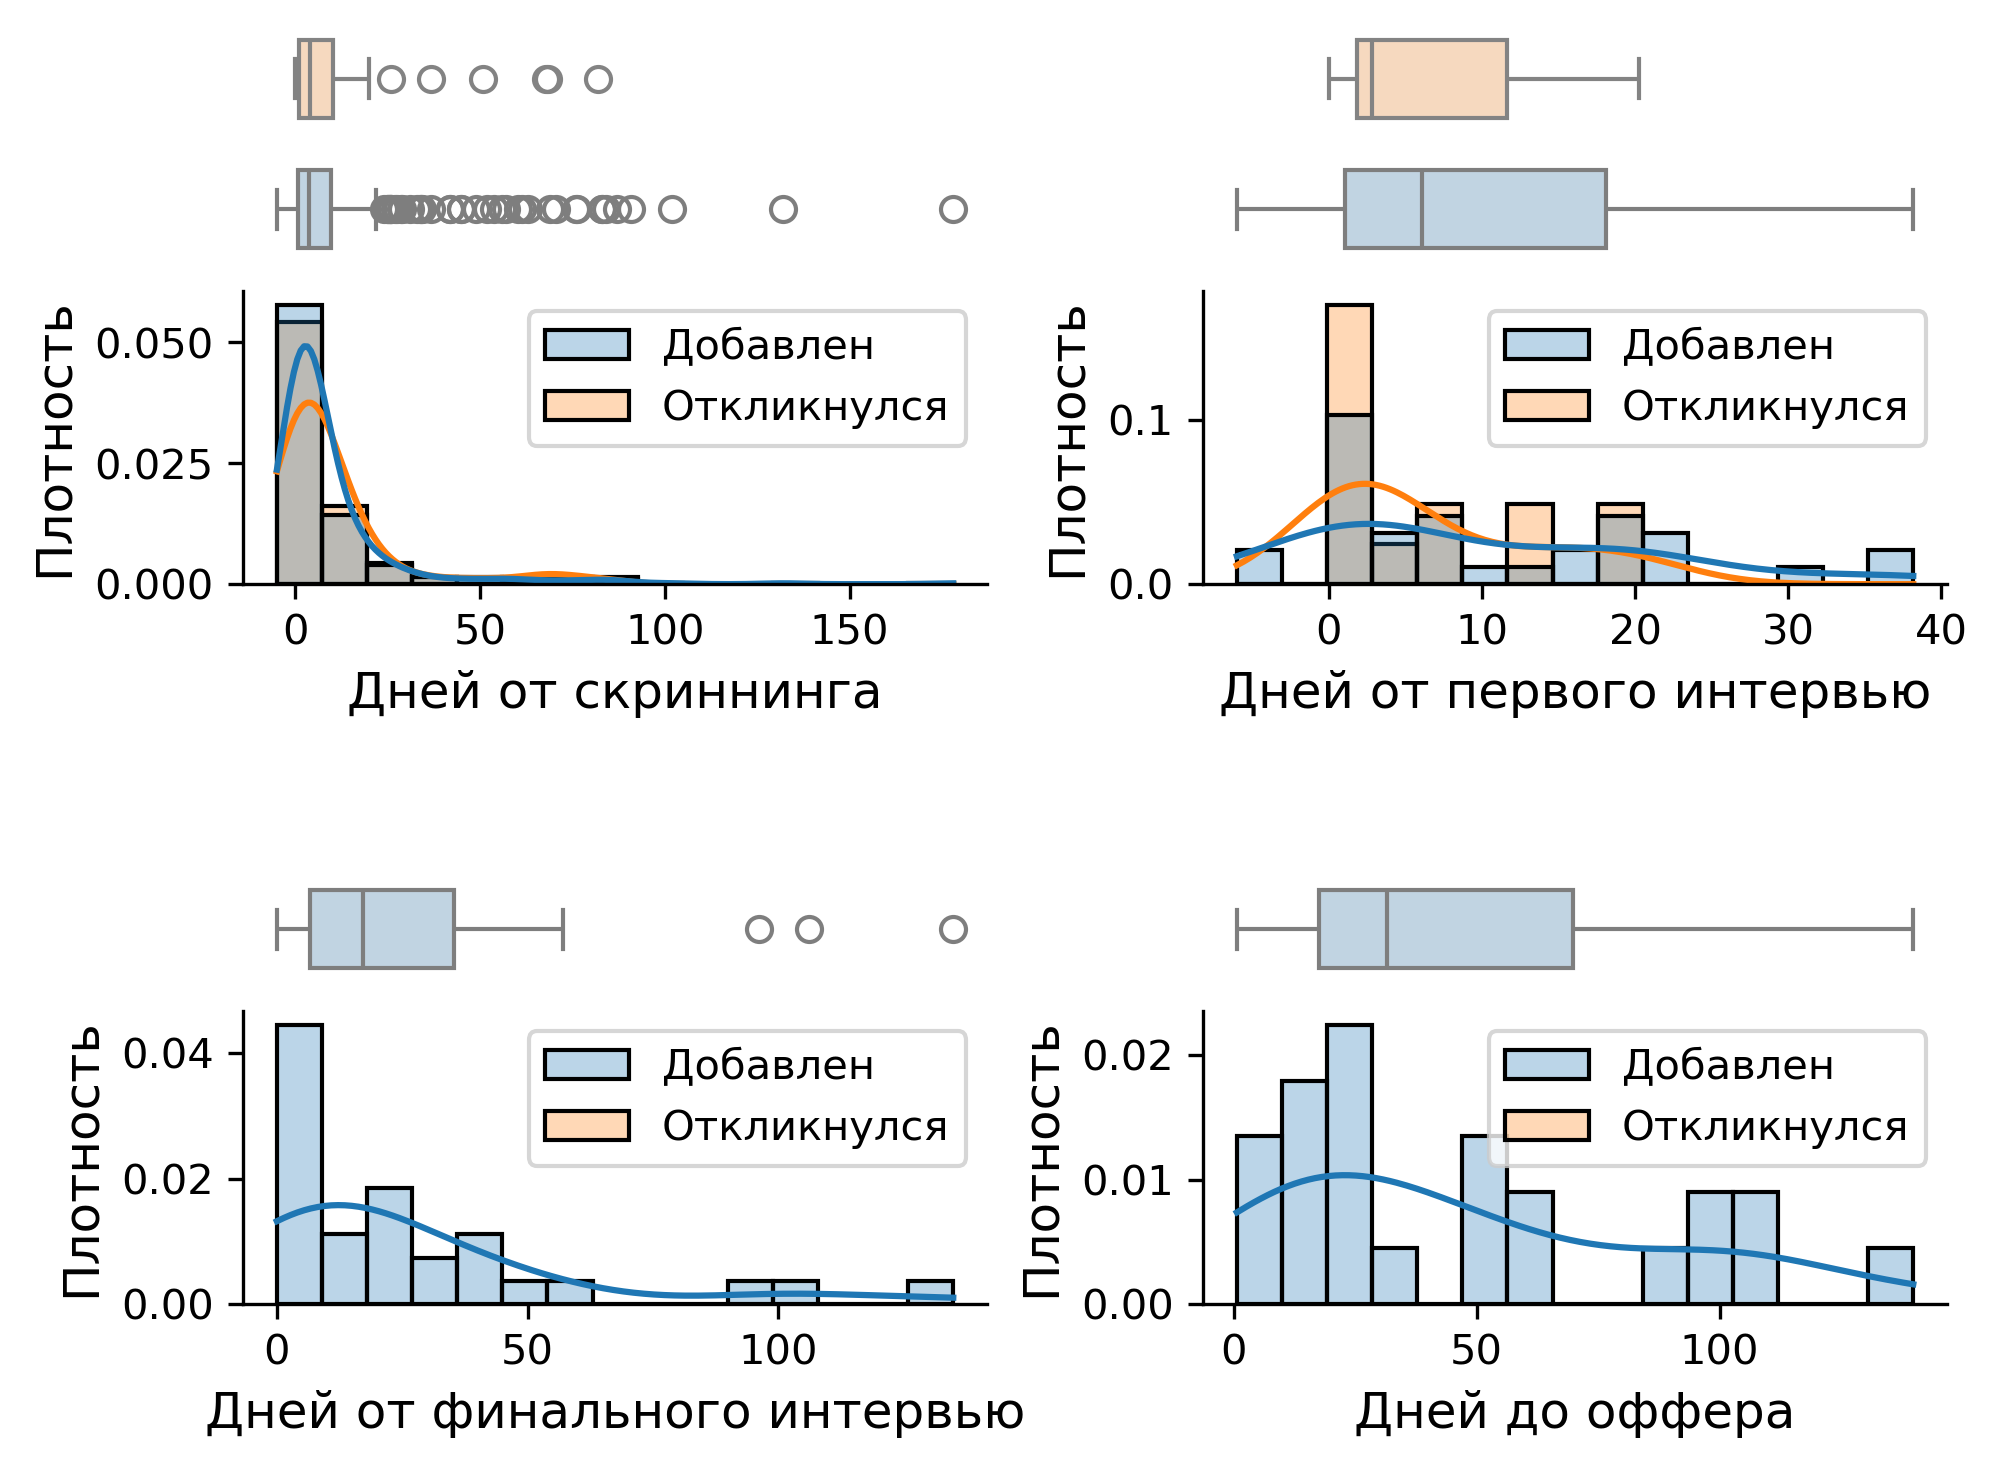

In [18]:
bins = 15
fig = plt.figure()
fig.dpi = 300
sfigs = fig.subfigures(2, 2)


for sfig, col in zip(sfigs.ravel(), intervals):
    sfig.figsize = (10, 10)
    (ax_box1, ax_box2, ax_hist) = sfig.subplots(
        3, 1,
        sharex=True,
        gridspec_kw={'height_ratios': [1, 1, 3]}
    )

    sns.boxplot(
        x=df[df.source_type=='Добавлен'][col],
        ax=ax_box2,
        orient='h',
        color='#bbd5e8'
    )
    ax_box1.set_title('')
    ax_box1.set_xlabel('')
    ax_box1.set_ylabel('')
    
    if sum(~ df[df.source_type=='Откликнулся'][col].isna()):
        sns.boxplot(
            x=df[df.source_type=='Откликнулся'][col],
            ax=ax_box1,
            orient='h',
            color='#ffd8b6'
        )

    sns.histplot(data = \
        [df[df.source_type=='Добавлен'][col].rename('Добавлен'),
         df[df.source_type=='Откликнулся'][col].rename('Откликнулся')],
        ax=ax_hist,
        stat="density",
        kde=True,
        alpha=0.3,
        bins=bins,
        common_norm=False
    )
    ax_hist.set_xlabel({"screening_to_next": "Дней от скриннинга",
                        "manager_to_client": "Дней от первого интервью",
                        "client_to_offer": "Дней от финального интервью",
                        "to_offer":"Дней до оффера"}[col], fontsize=12)
    ax_hist.set_ylabel('Плотность', fontsize=12)

    for ax_box in (ax_box1, ax_box2):
        ax_box.spines['top'].set_visible(False)
        ax_box.spines['right'].set_visible(False)
        ax_box.spines['left'].set_visible(False)
        ax_box.spines['bottom'].set_visible(False)
        ax_box_x = ax_box.get_xaxis()
        ax_box_x.set_visible(False)
        ax_box_y = ax_box.get_yaxis()
        ax_box_y.set_visible(False)
        
    ax_hist.spines['top'].set_visible(False)
    ax_hist.spines['right'].set_visible(False)

plt.show()

По графикам и сводной таблице можно сделать вывод (хоть данных и довольно мало), что в целом временные интервалы между этапами не зависят от того добавлен кандидат или откликнулся самостоятельно.

### 4.4. <a id='toc4_4_'></a>[Тест Манна-Уитни](#toc0_)

Чтобы подтвердить предположение о независимости статистически предлагаю ввести новое значение - среднее кол-во дней между всеми этапами:

In [19]:
df['mdays_by_round'] = df[list(set(intervals) - {'to_offer'})].mean(axis=1)

Среднее кол-во дней для "Добавлен": 10.456
Среднее кол-во дней для "Откликнулся": 10.192


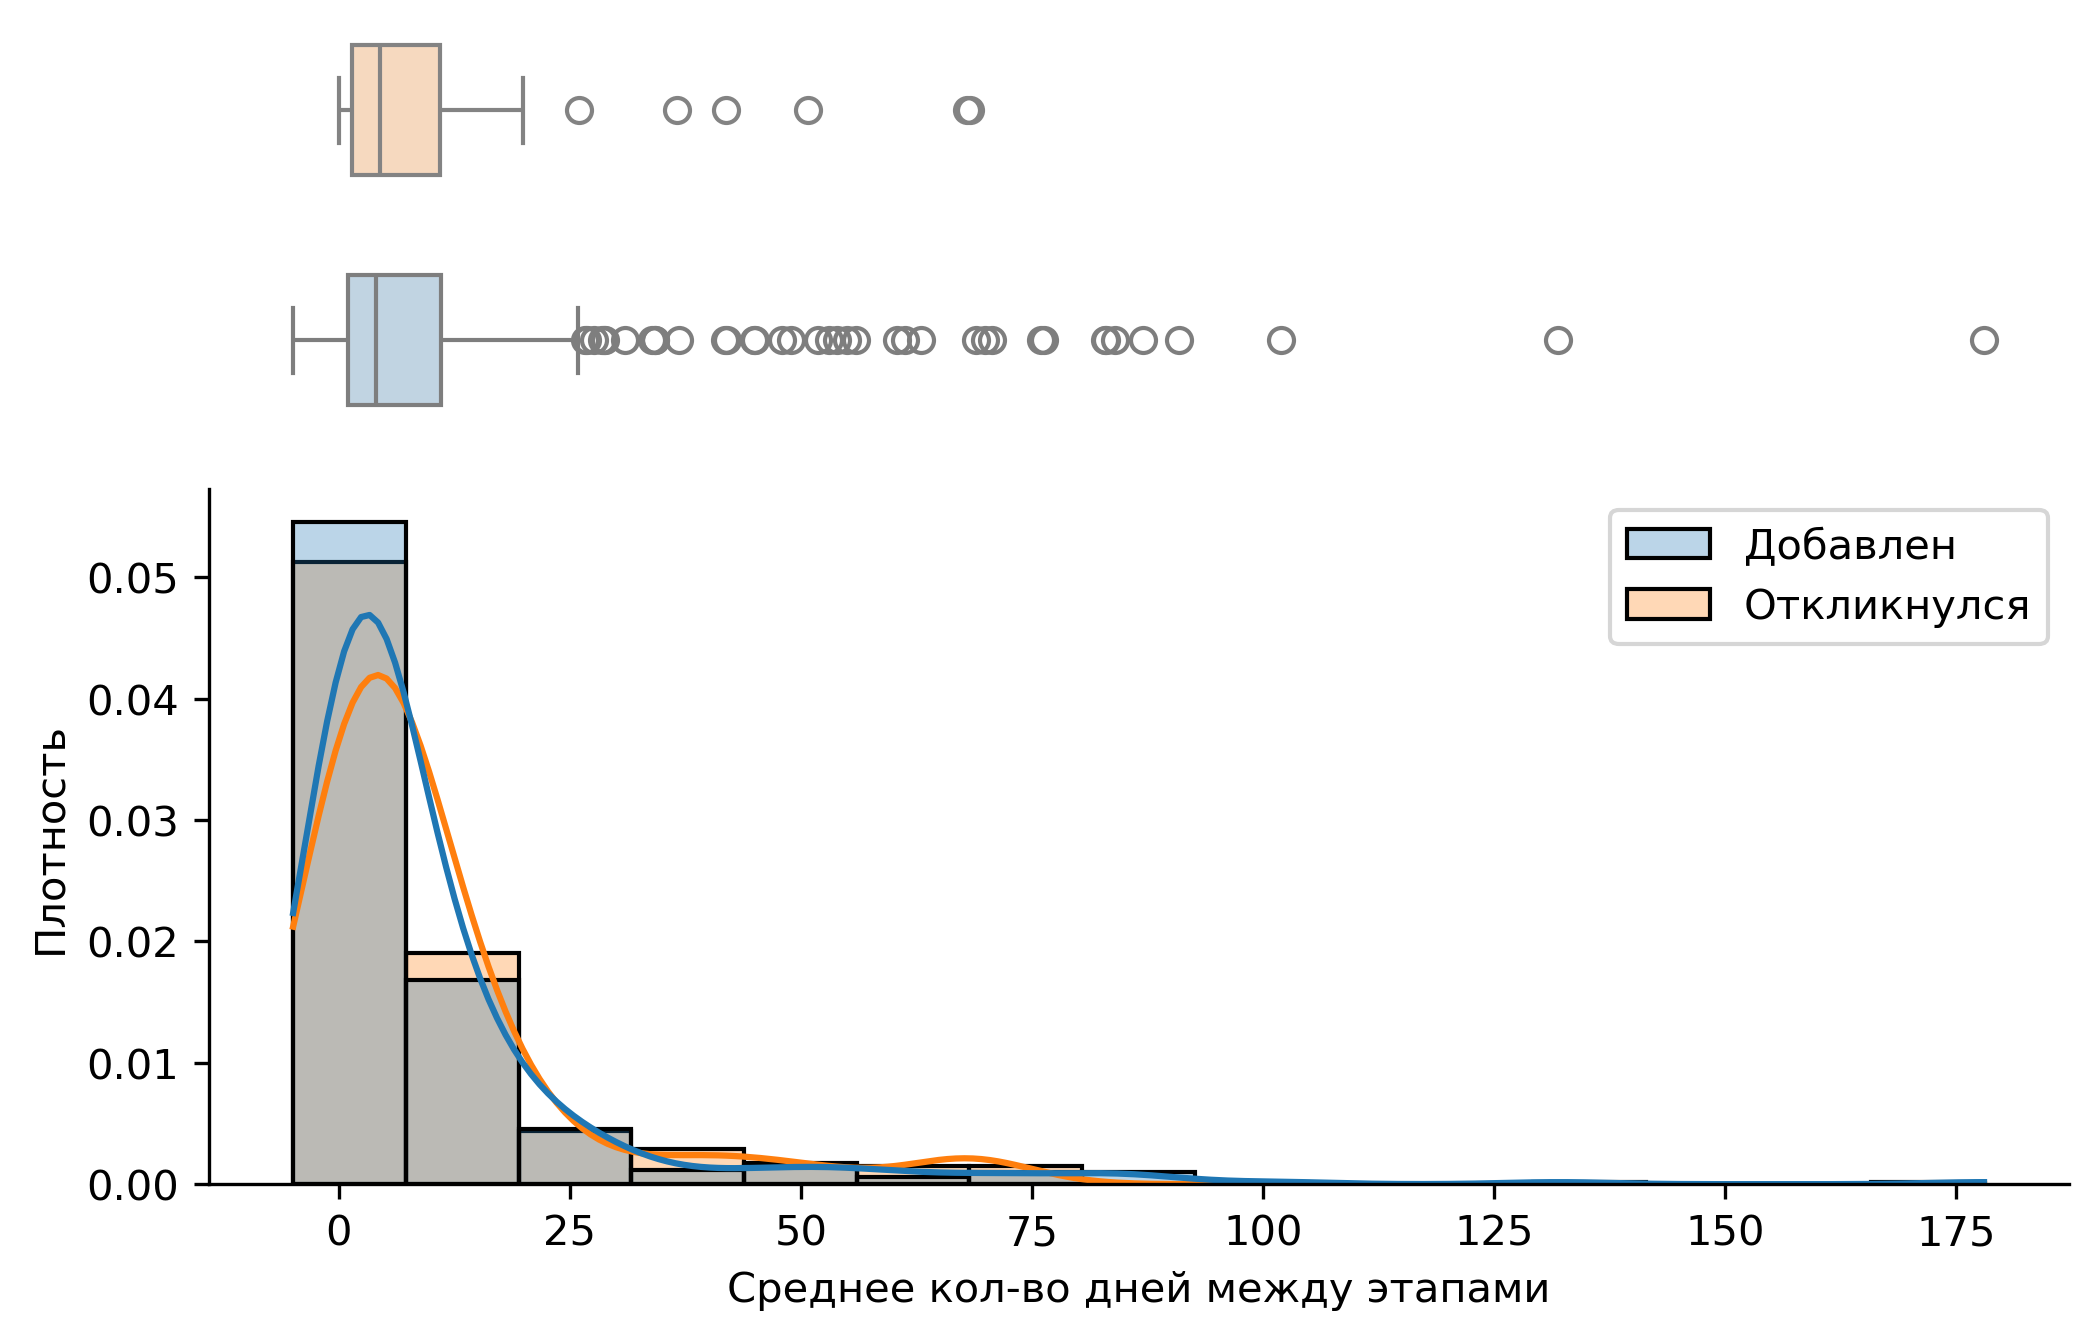

In [20]:
print('Среднее кол-во дней для "Добавлен":' + \
      f'{df[df.source_type=='Добавлен'].mdays_by_round.mean(): .3f}')
print('Среднее кол-во дней для "Откликнулся":' + \
      f'{df[df.source_type=='Откликнулся'].mdays_by_round.mean(): .3f}')

fig, (ax_box1, ax_box2, ax_hist) = plt.subplots(
    3, 1,
    sharex=True,
    gridspec_kw={'height_ratios': [0.7, 0.7, 3]},
    figsize=(8, 5))

fig.dpi = 300

sns.boxplot(
    x=df[df.source_type=='Откликнулся'].mdays_by_round,
    ax=ax_box1,
    orient='h',
    color='#ffd8b6'
)

sns.boxplot(
    x=df[df.source_type=='Добавлен'].mdays_by_round,
    ax=ax_box2,
    orient='h',
    color='#bbd5e8'
)

sns.histplot(
    data=[
        df[df.source_type=='Добавлен'].mdays_by_round.rename('Добавлен'),
        df[df.source_type=='Откликнулся'].mdays_by_round.rename('Откликнулся')
    ],
    ax=ax_hist,
    bins=15,
    alpha=0.3,
    kde=True,
    stat="density",
    common_norm=False
    
)

for ax_box in (ax_box1, ax_box2):
        ax_box.spines['top'].set_visible(False)
        ax_box.spines['right'].set_visible(False)
        ax_box.spines['left'].set_visible(False)
        ax_box.spines['bottom'].set_visible(False)
        ax_box_x = ax_box.get_xaxis()
        ax_box_x.set_visible(False)
        ax_box_y = ax_box.get_yaxis()
        ax_box_y.set_visible(False)
        
ax_hist.spines['top'].set_visible(False)
ax_hist.spines['right'].set_visible(False)
ax_hist.set_ylabel('Плотность')
ax_hist.set_xlabel('Среднее кол-во дней между этапами')

plt.show()

По графику всё также, как и с временными интервалами между этапами. Проверим, что распределения совпадают с помощью критерия Манна-Уитни (так как выборка слишком маленькая):

Пусть уровень значимости для теста - 15%. Нулевая гипотеза (H0):
- Распределение среднего кол-ва дней между этапами для добавленных кандидатов совпадает с распределением среднего кол-ва дней между этапами для кандидатов, откликнувшихся самостоятельно.

Альтернативная гипотеза (H1):
- Распределение среднего кол-ва дней между этапами для добавленных кандидатов НЕ совпадает с распределением среднего кол-ва дней между этапами для кандидатов, откликнувшихся самостоятельно.

In [21]:
_, p_value = mannwhitneyu(
    df[(df.source_type=='Добавлен') & \
       (df.mdays_by_round.notna())].mdays_by_round,
    df[(df.source_type=='Откликнулся') & \
       (df.mdays_by_round.notna())].mdays_by_round
)
print(f'{p_value*100:.0f}%')

47%


p_value > 15%, следовательно, мы не можем отвергнуть нулевую гипотезу, о равенстве распределений. Это ещё раз подтверждает предположение о том, что время между этапами не зависит от факта, что кандидат был добавлен или что сам откликнулся на вакансию.

## 5. <a id='toc5_'></a>[Построение воронки кандидатов](#toc0_)

### 5.1. <a id='toc5_1_'></a>[Заполнение пробелов между этапами](#toc0_)

Этап скрининга может быть пропущен и кандидат сразу попадёт на последующие этапы, поэтому, для таких случаев мы будем считать этап скрининга автоматически пройденным:

In [22]:
df_funnel = df
df_funnel.screening_at.notna().sum()

np.int64(3075)

In [23]:
df_funnel.screening_at = df_funnel.apply(
    lambda row: \
    row.screening_at if row.notna().screening_at else \
        (row.manager_interview_at if row.notna().manager_interview_at else \
            (row.client_interview_at if row.notna().client_interview_at else \
                row.screening_at))
    , axis=1
)
df_funnel.screening_at.notna().sum()

np.int64(3200)

Восстановили 125 записей. Аналогично может быть пропущен и этап интервью с менеджером:

In [24]:
df_funnel.manager_interview_at.notna().sum()

np.int64(124)

In [25]:
df_funnel.manager_interview_at = df_funnel.apply(
    lambda row: \
    row.manager_interview_at if row.notna().manager_interview_at else \
        (row.client_interview_at if row.notna().client_interview_at else \
            row.manager_interview_at)
    , axis=1
)
df_funnel.manager_interview_at.notna().sum()

np.int64(583)

Удалось восстановить больше 450 записей.

### 5.2. <a id='toc5_2_'></a>[Группировка по вакансиям](#toc0_)

Построим сводную таблицу, где по оси x - этапы, по оси y - вакансии, а в ячейках кол-во кандидатов прошедших соответствующие этапы по соответствующим вакансиям:

In [26]:
funnel_by_vacancies = \
    df_funnel[(df_funnel.rejected_at.notna()) | \
              (df_funnel.accepted_at.notna())].groupby('vacancy_id')[
    ['source_at',
     'screening_at',
     'manager_interview_at',
     'client_interview_at',
     'offer_at']
].count()
              
funnel_by_vacancies

,source_at,screening_at,manager_interview_at,client_interview_at,offer_at
vacancy_id,,,,,
440512,4,3,3,3,0
440635,35,34,4,4,1
441489,1,0,0,0,0
442537,301,246,1,1,0
442539,2,2,1,1,1
...,...,...,...,...,...
577962,2,1,0,0,0
579286,16,5,0,0,0
579840,8,4,0,0,0


### 5.3. <a id='toc5_3_'></a>[Построение дашборда](#toc0_)

Варианты для выпадающего списка:

In [27]:
vacancy_ids = ["Все"] + funnel_by_vacancies.index.tolist()

Сам выпадающий список:

In [28]:
dropdown = widgets.Dropdown(
    options=vacancy_ids,
    value="Все",
    description='Вакансия:',
    disabled=False
)

Функция обновления дашборда:

In [29]:
output = widgets.Output()


def update_plot(change):
    with output:
        output.clear_output(wait=True)

        fig = go.Figure(go.Funnel(
            y = ["Добавление/Отклик", "Скриннинг", "Интервью с менеджером", "Интервью с заказчиком", "Оффер"],
            x = funnel_by_vacancies.sum() if str(change.new)=="Все" \
                    else funnel_by_vacancies.loc[change.new],
            textposition = "inside",
            textinfo = "value+percent initial",
            marker = {"color": ["#53a1a5", "#83ddb5",
                                "#417758", "#dd7596",
                                "#ce4185"]}
        ))
        
        fig.update_layout(height=500)
        fig.show()
        
        
dropdown.observe(update_plot, names='value')

Выводим вариант дашборда по всем вакансиям:

In [30]:
class init:
    new = 'Все'
    
display(dropdown, output)
update_plot(init)

Dropdown(description='Вакансия:', options=('Все', 440512, 440635, 441489, 442537, 442539, 442576, 442579, 4458…

Output()

## 6. <a id='toc6_'></a>[Разбиение вакансий по группам](#toc0_)

Для наглядности будущего графика будем разбивать вакансии по трём критериям (чтобы получился трёхмерный график):
1. Средняя разность конверсий по всем этапам (отражает, какую долю кандидатов в среднем отвергают за один этап);
2. Медиана от среднего временных промежутков между этапами (отражает, как быстро происходит движение по этапам);
3. Стандартное отклонение распределения типов самой популярной причина отказа (отражает, как сильно разнятся причины отказа).

### 6.1. <a id='toc6_1_'></a>[Стандартное отклонение распределения типов причины отказа](#toc0_)

Всевозможные причины отказа:

In [31]:
df.rejection_reason.unique()

array([nan, 'Не подходит по профилю', 'Специфический персонально',
       'Работодатель отказал после интервью',
       'Не интересна индустрия/компания',
       'Отказ от вакансии - Другое (см. комментарии)',
       'Не актуально/нашёл другую работу/не в поисках',
       'Не рассматривает позиции в РФ',
       'Невозможно дозвониться/Не выходит на связь',
       'Не прошёл чек/Чёрный список', 'По профессиональным компетенциям',
       'Не устроила ЗП', 'Далеко/неудобно добираться', 'Только удалёнка',
       'по уровню позиции',
       'Общается с другим агентством/С компанией напрямую',
       'В декретном отпуске', 'Отказался сам после интервью',
       'Нет английского языка/Плохой уровень', 'Отказ по результатам ТЗ',
       'Не подходит график работы'], dtype=object)

Определим три типа причин отказа:
- из-за кандидата
- из-за вакансии
- из-за обстоятельств


In [32]:
df['rejection_type'] = df.rejection_reason.apply(
    lambda reason:
        'candidate' if reason in [
            'Не подходит по профилю',
            'Специфический персонально',
            'Работодатель отказал после интервью',
            'По профессиональным компетенциям',
            'Нет английского языка/Плохой уровень',
            'Отказ по результатам ТЗ',
            'Не прошёл чек/Чёрный список'
        ] else \
        'vacancy' if reason in [
            'Не интересна индустрия/компания',
            'Не рассматривает позиции в РФ',
            'Не устроила ЗП',
            'Далеко/неудобно добираться',
            'Только удалёнка',
            'по уровню позиции',
            'Отказался сам после интервью',
            'Не подходит график работы'
        ] else \
        'other' if reason in [
            'Не актуально/нашёл другую работу/не в поисках',
            'Невозможно дозвониться/Не выходит на связь',
            'Общается с другим агентством/С компанией напрямую',
            'В декретном отпуске',
            'Отказ от вакансии - Другое (см. комментарии)'
        ] else reason
)

### 6.2. <a id='toc6_2_'></a>[Медиана от среднего временных промежутков между этапами](#toc0_)

In [33]:
vacancy_df = df.groupby('vacancy_id')[['rejection_type',
                                       'mdays_by_round']].agg({
    'rejection_type': lambda x: \
        x.value_counts().sort_values().std() \
            if len(x.value_counts()) else np.nan,
    'mdays_by_round': 'median'
}).dropna()
vacancy_df

,rejection_type,mdays_by_round
vacancy_id,,
440512,1.414214,1.660269
440635,1.154701,6.121279
442537,61.849279,6.649651
442579,0.707107,5.013178
445898,13.051181,7.165805
...,...,...
555101,0.000000,6.088464
556557,2.886751,24.435595
572867,2.886751,1.818010


### 6.3. <a id='toc6_3_'></a>[Средняя разность конверсий по всем этапам](#toc0_)

In [34]:
rounds = funnel_by_vacancies.columns

In [35]:
funnel_by_vacancies['mean_rejected_by_round'] = \
    funnel_by_vacancies.apply(
        lambda row: np.mean([100-row[curr_round]/row[prev_round]*100 \
                    for curr_round,
                        prev_round in zip(rounds[1:],rounds[:-1]) \
                    if row[curr_round]]),
    axis=1)
funnel_by_vacancies['mean_rejected_by_round']

c:\Users\spesi\miniforge3\envs\csc_hr\Lib\site-packages\numpy\_core\fromnumeric.py:3824: RuntimeWarning:

Mean of empty slice

c:\Users\spesi\miniforge3\envs\csc_hr\Lib\site-packages\numpy\_core\_methods.py:142: RuntimeWarning:

invalid value encountered in scalar divide



vacancy_id
440512     8.333333
440635    41.523109
441489          NaN
442537    39.288640
442539    12.500000
            ...    
577962    50.000000
579286    68.750000
579840    50.000000
583234    50.000000
584805    25.000000
Name: mean_rejected_by_round, Length: 109, dtype: float64

In [36]:
vacancy_df = vacancy_df.merge(
    funnel_by_vacancies['mean_rejected_by_round'].dropna(),
    on='vacancy_id',
    how='inner'
)
vacancy_df

,rejection_type,mdays_by_round,mean_rejected_by_round
vacancy_id,,,
440512,1.414214,1.660269,8.333333
440635,1.154701,6.121279,41.523109
442537,61.849279,6.649651,39.288640
442579,0.707107,5.013178,88.888889
445898,13.051181,7.165805,36.011905
...,...,...,...
555101,0.000000,6.088464,33.333333
556557,2.886751,24.435595,13.690476
572867,2.886751,1.818010,31.250000


### 6.4. <a id='toc6_4_'></a>[Поиск групп вакансий с помощью кластеризации](#toc0_)

Для обнаружения групп будем использовать ML-подход, а конкретнее кластеризацию. Так как мы не знаем точное кол-во кластеров, будем использовать алгоритм **HDBSCAN**:

In [37]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3)
clusters = clusterer.fit_predict(vacancy_df)

In [38]:
len(set(clusters))

3

Всего 3 кластера. Для корректной интерпретации построим график:

In [39]:
vacancy_df['cluster'] = clusters
vacancy_df['cluster']

vacancy_id
440512    1
440635    1
442537   -1
442579   -1
445898    1
         ..
555101    1
556557   -1
572867    1
579840    1
584805    1
Name: cluster, Length: 81, dtype: int64

### 6.5. <a id='toc6_5_'></a>[3D-визуализация полученных кластеров](#toc0_)

In [40]:
vacancy_df.reset_index(inplace=True)
vacancy_df['rejection_type_code'] = \
    pd.Categorical(vacancy_df['rejection_type']).codes

fig = px.scatter_3d(
    vacancy_df,
    x='mdays_by_round',
    y='mean_rejected_by_round',
    z='rejection_type_code',
    color='cluster',
    hover_name='vacancy_id',
    hover_data=['rejection_type'],
    title="3D Кластеризация",
    labels={
        'mdays_by_round': 'Дни между этапами',
        'mean_rejected_by_round': 'Уменьшение доли кандидатов',
        'rejection_type_code': 'Стандартное отклонение причин отказа'
    }
)

fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))


fig.show()

Исходя из графика можно выделить три группы вакансий:
- вакансии розового цвета с быстрыми промежутками между этапами и около нулевым уменьшением доли кандидатов за этап (вакансии, которые активно, быстро обрабатываются и, скорее всего, не требующие особо специализированных навыков), высокая эффективность рекрутинг-воронки, необходимо сохранять темп текущих процессов;

- вакансии желтого цвета с быстрыми промежутками между этапами и стандартным уменьшением доли кандидатов за этап (вакансии, аналогичные предыдущим, но требующие более специализированные навыки), хорошее уменьшение конверсии на ранних этапах, необходимо сфокусироваться на улучшениях финальных этапов;

- вакансии синего цвета, у которых наиболее длительные интервалы между этапами отбора (не очень активные вакансии), низкая эффективность воронки, требуется комплексная оптимизация всех этапов.

Как можно заметить, разброс причин отказа не сильно повлиял на отбор кластеров, а желтых вакансий больше всего. На втором месте синие вакансии, а на третьем - розовые.

## 7. <a id='toc7_'></a>[Заключение](#toc0_)

В данной работе я использовал язык Python вместе с интерактивной средой разработки Jupyter Notebook. Также были использованы различные сторонние библиотеки:

- ***pandas***, ***numpy*** - для работы с данными;
- ***missingno*** - для визуализации пропусков в данных;
- ***scipy*** - для проведения статистического теста;
- ***hdbscan*** - для кластеризации данных;
- ***matplotlib***, ***seaborn***, ***plotly*** для построения графиков и дашборда;
- ***ipywidgets***, ***Ipython*** - виджеты для дашборда и его корректное отображение;

Также для более быстрого и качественного написания кода мной были использованы такие LLM-модели как:
- ***Qwen3***: для помощи с кодом;
- ***Gemini***: для помощи в генерации идей.

Также неоднократно использовал поиск в браузере, когда возникали трудности, и, конечно же, сайты с документацией вышеперечисленных библиотек.


Ключевые навыки и знания, использованные мной в данной работе:
- ***Анализ данных*** - аналитическое мышление и углублённое понимание математических основ, лежащих в основе любой исследовательской деятельности;
- ***Программирование на Python*** - навыки написания различных уровней сложности программ в купе с немалым опытом и сформированным алгоритмическим подходом к решению задач;
- ***Работа с данными на Python*** - уверенное использования библиотек для работы с данными и понимание, что лежит за готовыми функциями в них;
- ***Визуализация данных на Python*** - навыки отображения распределений исследуемых данных и их зависимостей от различных критериев.

Для решения подобных задач на постоянной основе, с учетом постоянного обновления данных, я бы предложил использовать такие технологии (хоть сам и не имею опыта работы с ними, увы):
- Базу данных: для хранения и управления данными, PostegreSQL или MySQL;
- ETL-процессы: для сбора данных из разных источников и оперативного доступа к ним, Talend или Apache Airflow;
- BI-инструменты: для построение интерактивных дашбордов, динамически обновляющихся с появлением новых данных, Tableau или Power BI. 